In [ ]:
%run selectors.ipynb

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Looking at average spiking and example rasters

[]

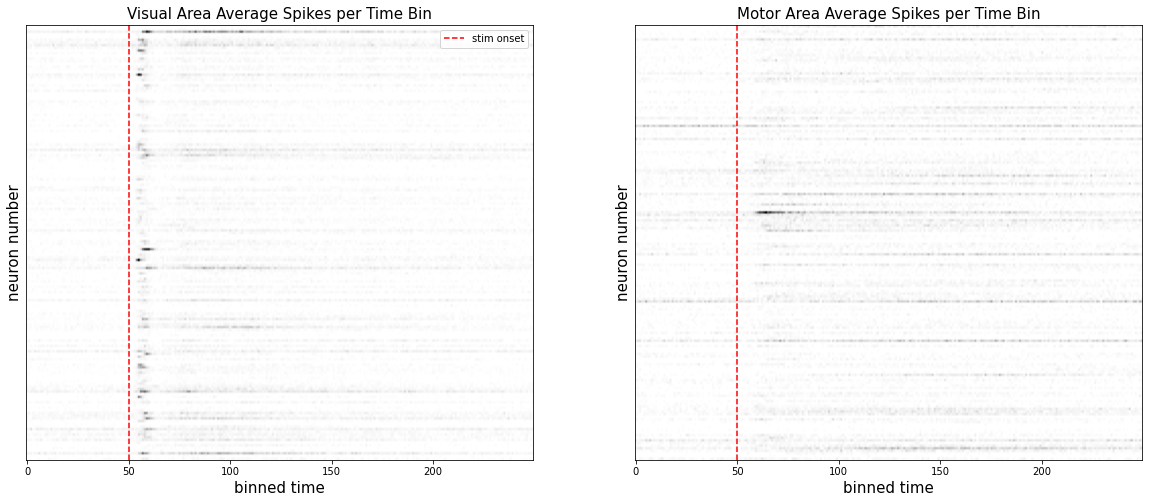

In [195]:
import matplotlib.pyplot as plot

# plotting param
FONT_SIZE = 15

# here we use the 11th session
sub = 25
sel = selectors[sub]
vis_dat = alldat[sub]['spks'][sel["NEURON_VISUAL"]]
motor_dat = alldat[sub]['spks'][sel["NEURON_MOTOR"]]

#neurons x trials x time bins
fig, axs = plot.subplots(1, 2, figsize=(20,8))
axs[0].imshow(np.squeeze(np.mean(vis_dat, axis=1)), cmap='Greys', aspect='auto')
axs[1].imshow(np.squeeze(np.mean(motor_dat, axis=1)), cmap='Greys', aspect='auto')
axs[0].axvline(x=50, color='red', linestyle='--', label='stim onset')
axs[1].axvline(x=50, color='red', linestyle='--', label='stim onset')

# set title, axes labels, and legend
axs[0].set_title('Visual Area Average Spikes per Time Bin', fontsize=FONT_SIZE)
axs[1].set_title('Motor Area Average Spikes per Time Bin', fontsize=FONT_SIZE)
axs[0].legend()

axs[0].set_xlabel('binned time', fontsize=FONT_SIZE)
axs[0].set_ylabel('neuron number', fontsize=FONT_SIZE)
axs[0].set_yticks([])

axs[1].set_xlabel('binned time', fontsize=FONT_SIZE)
axs[1].set_ylabel('neuron number', fontsize=FONT_SIZE)
axs[1].set_yticks([])

### Comparing average spikes across conditions

[]

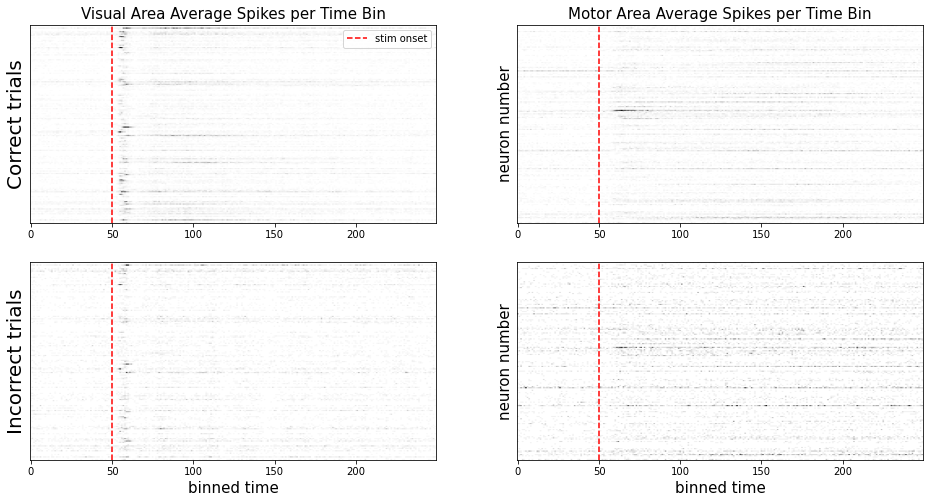

In [196]:
# correct vs. incorrect trials
correct = selectors[sub]["CHOICE_CORRECT"]

# neurons x trials x time bins
fig, axs = plot.subplots(2, 2, figsize=(16,8))

axs[0, 0].imshow(np.squeeze(np.mean(vis_dat[:, correct,:], axis=1)), cmap='Greys', aspect='auto')
axs[0, 1].imshow(np.squeeze(np.mean(motor_dat[:, correct,:], axis=1)), cmap='Greys', aspect='auto')
axs[0, 0].axvline(x=50, color='red', linestyle='--', label='stim onset')
axs[0, 1].axvline(x=50, color='red', linestyle='--', label='stim onset')

axs[1, 0].imshow(np.squeeze(np.mean(vis_dat[:, np.logical_not(correct),:], axis=1)), cmap='Greys', aspect='auto')
axs[1, 1].imshow(np.squeeze(np.mean(motor_dat[:, np.logical_not(correct),:], axis=1)), cmap='Greys', aspect='auto')
axs[1, 0].axvline(x=50, color='red', linestyle='--', label='stim onset')
axs[1, 1].axvline(x=50, color='red', linestyle='--', label='stim onset')

# set title, axes labels, and legend
axs[0, 0].set_title('Visual Area Average Spikes per Time Bin', fontsize=FONT_SIZE)
axs[0, 1].set_title('Motor Area Average Spikes per Time Bin', fontsize=FONT_SIZE)
axs[0, 0].legend()

axs[1, 0].set_xlabel('binned time', fontsize=FONT_SIZE)
axs[0, 1].set_ylabel('neuron number', fontsize=FONT_SIZE)
axs[0, 0].set_ylabel('Correct trials', fontsize=FONT_SIZE+5)

axs[1, 1].set_xlabel('binned time', fontsize=FONT_SIZE)
axs[1, 1].set_ylabel('neuron number', fontsize=FONT_SIZE)
axs[1, 0].set_ylabel('Incorrect trials', fontsize=FONT_SIZE+5)

axs[0, 0].set_yticks([])
axs[0, 1].set_yticks([])
axs[1, 0].set_yticks([])
axs[1, 1].set_yticks([])

### Exploring single trial raster plots

Text(0.5, 0.98, 'Raster Plot for Trial:  15')

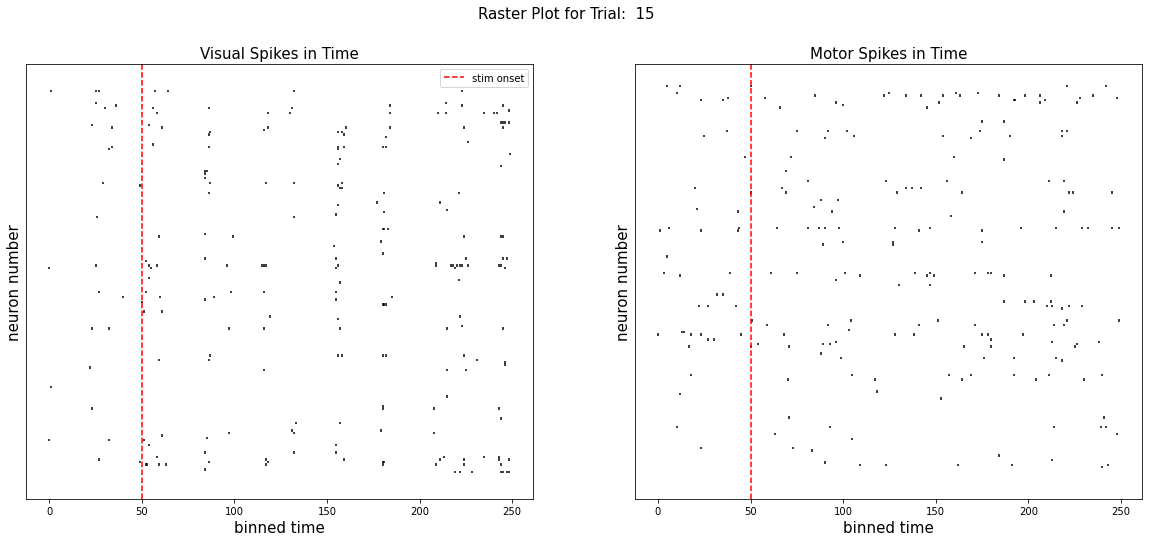

In [197]:
# average raster plots
# neurons x trials x time bins
fig, axs = plot.subplots(1, 2, figsize=(20,8))

trl = 15

numel = vis_dat.shape[0]
spikes=[np.where(vis_dat[i, trl, :])[0].tolist() for i in range(numel)]
axs[0].eventplot(spikes, color='black');
axs[0].axvline(x=50, color='red', linestyle='--', label='stim onset')

numel = motor_dat.shape[0]
spikes=[np.where(motor_dat[i, trl, :])[0].tolist() for i in range(numel)]
axs[1].eventplot(spikes, color='black');
axs[1].axvline(x=50, color='red', linestyle='--')

# set title, axes labels, and legend
axs[0].set_title('Visual Spikes in Time', fontsize=FONT_SIZE)
axs[1].set_title('Motor Spikes in Time', fontsize=FONT_SIZE)
axs[0].legend()

axs[0].set_xlabel('binned time', fontsize=FONT_SIZE)
axs[0].set_ylabel('neuron number', fontsize=FONT_SIZE)
axs[0].set_yticks([])

axs[1].set_xlabel('binned time', fontsize=FONT_SIZE)
axs[1].set_ylabel('neuron number', fontsize=FONT_SIZE)
axs[1].set_yticks([])

plot.suptitle('Raster Plot for Trial: % i' % trl, fontsize=FONT_SIZE)

## Histograms of spike counts and ISI over all trials

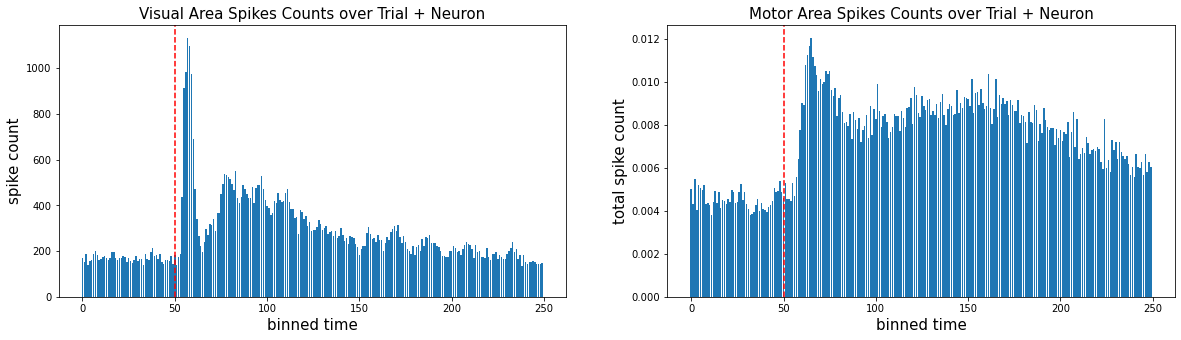

In [198]:
from matplotlib import rcParams 

# histogram of the location of spikes for visual and motor areas
fig, axs = plot.subplots(1, 2, figsize=(20,5))

axs[0].bar(np.arange(0 ,250), np.sum(vis_dat, axis=(0, 1)))
axs[0].axvline(x=50, color='red', linestyle='--', label='stim onset')
axs[0].set_title('Visual Area Spikes Counts over Trial + Neuron', fontsize=FONT_SIZE)
axs[0].set_xlabel('binned time', fontsize=FONT_SIZE);
axs[0].set_ylabel('spike count', fontsize=FONT_SIZE);

axs[1].bar(np.arange(0 ,250), np.mean(motor_dat, axis=(0, 1)))
axs[1].axvline(x=50, color='red', linestyle='--', label='stim onset')
axs[1].set_title('Motor Area Spikes Counts over Trial + Neuron', fontsize=FONT_SIZE)
axs[1].set_xlabel('binned time', fontsize=FONT_SIZE);
axs[1].set_ylabel('total spike count', fontsize=FONT_SIZE);

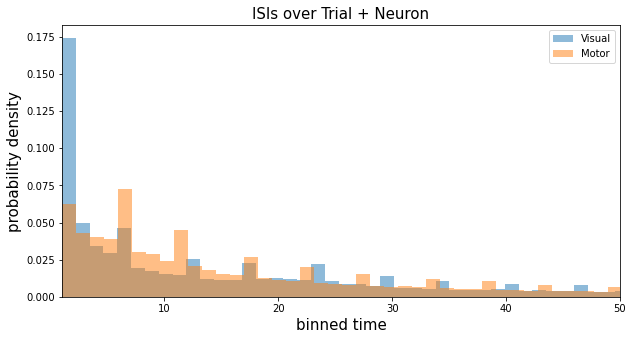

In [199]:
# histogram of inter-spike intervals for visual and motor areas
fig, axs = plot.subplots(1, 1, figsize=(10,5))
ISIs = [np.diff(np.where(vis_dat[i, j, :])) 
         for j in range(vis_dat.shape[1]) for i in range(vis_dat.shape[0])]
flat_ISIs = np.array([item for sublist in ISIs for item in sublist[0]])
axs.hist(flat_ISIs, bins=200, density=True, alpha=0.5, label='Visual');

ISIs = [np.diff(np.where(motor_dat[i, j, :])) 
         for j in range(motor_dat.shape[1]) for i in range(motor_dat.shape[0])]
flat_ISIs = np.array([item for sublist in ISIs for item in sublist[0]])
axs.hist(flat_ISIs, bins=200, density=True, alpha=0.5, label='Motor');

axs.set_title('ISIs over Trial + Neuron', fontsize=FONT_SIZE)
axs.set_xlabel('binned time', fontsize=FONT_SIZE);
axs.set_ylabel('probability density', fontsize=FONT_SIZE);
axs.set_xlim(1, 50)
axs.legend();

## Cross-correlation analysis

In [200]:
def xcorr(x, y):
    """
    Cross-correlates vectors x and y returning statistical correlation coefficients.

    Args:
        x (np.ndarray): vector 1
        y (np.ndarray): vector 2

    Returns
        correlation (np.ndarray): fully lagged correlation coefficients
    """
    inner_product = np.correlate(x, y, "full")
    n = np.sqrt(np.dot(x, x) * np.dot(y, y))
    if n==0:
        return 0
    return np.true_divide(inner_product,n)


def plot_corr(corr, corr_idx, corr_thresh=0.1):
    """
    Estimates T_hat as the first stage of a two-stage least squares.

    Args:
        corr (np.ndarray): matrix of max correlation r values (n, n)
        corr_idx (np.ndarray): matrix of max correlation lag (n, n)
        corr_thresh (np.ndarray): scalar threshold for all elements included in histogram

    """
    fig, axs = plot.subplots(2, 2, figsize=(20,16))

    area_labels = ('visual', 'motor', 'between')
    
    # define number of neurons within each area
    area_n = np.array([vis_dat.shape[0], motor_dat.shape[0]])
    n = np.sum(area_n)
   
    # correlation and lag matrices
    pos=axs[0, 0].imshow(np.tril(corr.T) + np.triu(corr, 1), aspect='auto')
    pos.set_clim(0, 1)
    cbar=fig.colorbar(pos, ax=axs[0, 0])
    cbar.set_label('r-val', rotation=270, fontsize=20)

    pos=axs[0, 1].imshow(np.tril(corr_idx.T) + np.triu(corr_idx, 1), cmap="RdBu", aspect='auto')
    pos.set_clim(-250, 250)
    cbar=fig.colorbar(pos, ax=axs[0, 1])
    cbar.set_label('lag', rotation=270, fontsize=20)

    # set up labels and ticks
    for i in range(2):    
        # lines separating areas
        axs[0, i].axvline(x=all_dat.shape[0]-motor_dat.shape[0], color='black', lw=3)
        axs[0, i].axhline(y=all_dat.shape[0]-motor_dat.shape[0], color='black', lw=3)

        # labeling xticks with area type
        axs[0, i].set_xticks([vis_dat.shape[0]/2, vis_dat.shape[0]+motor_dat.shape[0]/2])
        axs[0, i].set_xticklabels(area_labels, fontsize=15)
        axs[0, i].set_yticks([vis_dat.shape[0]/2, vis_dat.shape[0]+motor_dat.shape[0]/2])
        axs[0, i].set_yticklabels(area_labels[:2], fontsize=15)

        # setting x and y labels
        axs[0, i].set_ylabel('Neurons', fontsize=20)
        axs[0, i].set_xlabel('Neurons', fontsize=20)
    
    # defined for bollean mask operations
    triu = np.arange(n)[:,None] < np.arange(n)
    mask = np.concatenate((np.ones((n, area_n[0]), dtype=bool), 
                                          np.zeros((n, area_n[1]), dtype=bool)), axis=1)
    
    vis_within = np.logical_and(triu, mask)
    between = np.logical_and(np.logical_and(triu, np.logical_not(mask)), mask.T)
    mot_within = np.logical_and(np.logical_and(triu, np.logical_not(mask)), 
                                np.logical_not(mask.T))
  
    # plot histogram distributions of correlation within vs. between areas
    axs[1, 0].hist(corr[np.logical_and(vis_within, corr>corr_thresh)], 
                   label=area_labels[0], alpha=0.5, density=True)
    axs[1, 0].hist(corr[np.logical_and(mot_within, corr>corr_thresh)], 
                   label=area_labels[1], alpha=0.3, density=True)
    axs[1, 0].hist(corr[np.logical_and(between, corr>corr_thresh)],
                   label=area_labels[2], alpha=0.3, density=True)
    axs[1, 0].legend()
    axs[1, 0].set_xlabel('correlation value', fontsize=20)
    axs[1, 0].set_ylabel('probability density', fontsize=20)
    
    # plot histogram distributions of best lag within vs. between areas (vertical line at mean)
    axs[1, 1].hist(corr_idx[np.logical_and(vis_within, corr>corr_thresh)], 
                   label=area_labels[0], alpha=0.5, density=True)
    axs[1, 1].axvline(np.mean(corr_idx[np.logical_and(vis_within, corr>corr_thresh)]), 
                color='tab:blue', linestyle='dashed', linewidth=3)
    
    axs[1, 1].hist(corr_idx[np.logical_and(mot_within, corr>corr_thresh)], 
                   label=area_labels[1], alpha=0.3, density=True)
    axs[1, 1].axvline(np.mean(corr_idx[np.logical_and(mot_within, corr>corr_thresh)]),
                color='tab:orange', linestyle='dashed', linewidth=2)
    
    axs[1, 1].hist(corr_idx[np.logical_and(between, corr>corr_thresh)],
                   label=area_labels[2], alpha=0.3, density=True)
    axs[1, 1].axvline(np.mean(corr_idx[np.logical_and(between, corr>corr_thresh)]), 
                color='tab:green', linestyle='dashed', linewidth=3)
    
    print('Optimal lag between visual neurons: %.2f ms' % 
          (np.mean(corr_idx[np.logical_and(vis_within, corr>corr_thresh)])*10))
    print('Optimal lag between motor neurons: %.2f ms' % 
          (np.mean(corr_idx[np.logical_and(mot_within, corr>corr_thresh)])*10))
    print('Optimal lag between visual and motor: %.2f ms' % 
          (np.mean(corr_idx[np.logical_and(between, corr>corr_thresh)])*10))
    
    # setting figure labels
    axs[1, 1].legend()
    axs[1, 1].set_xlabel('lag time with highest correlation', fontsize=20)
    axs[1, 1].set_ylabel('probability density', fontsize=20)
    
    return vis_within, mot_within, between

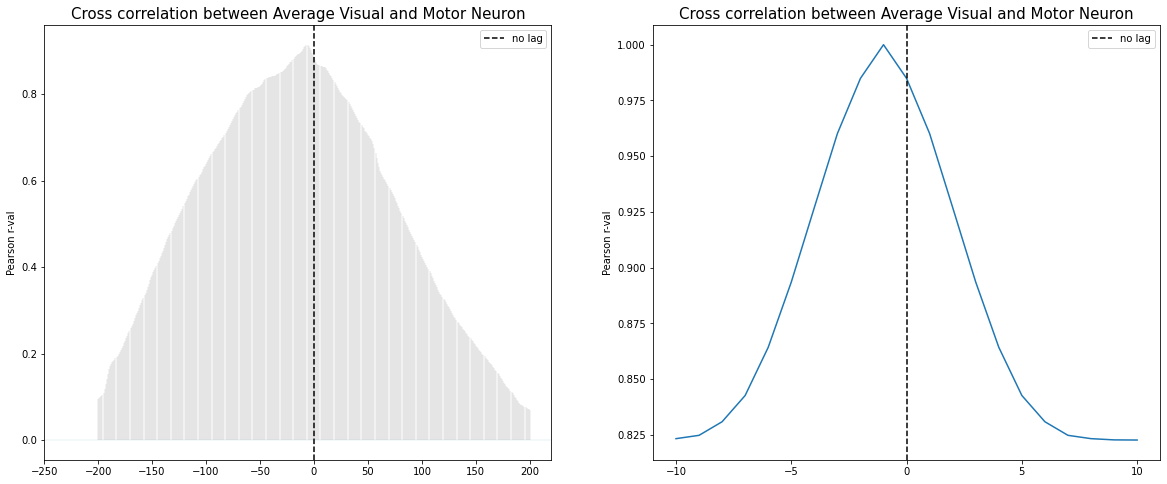

In [201]:
from scipy import signal

#cross correlation between average vectorized motor and visual area neurons
norm_vis = np.mean(vis_dat, axis=(0, 1))
norm_motor = np.mean(vis_dat, axis=(0, 1))

fig, axs = plot.subplots(1, 2, figsize=(20,8))
axs[0].xcorr(np.mean(vis_dat, axis=(0, 1)), np.mean(motor_dat, axis=(0, 1)), 
           usevlines=True, maxlags=200, normed=True, lw=0.1);
axs[0].axvline(x=0, color='black', linestyle='--', label='no lag')
axs[0].set_title('Cross correlation between Average Visual and Motor Neuron', fontsize=FONT_SIZE)
axs[0].set_ylabel('Pearson r-val')
axs[0].set_xticks(np.arange(-250, 250, 50))
axs[0].legend()

corr = xcorr(norm_vis, norm_vis)
axs[1].plot(np.arange(-10, 11), corr[240:261])
axs[1].axvline(x=0, color='black', linestyle='--', label='no lag')
axs[1].set_title('Cross correlation between Average Visual and Motor Neuron', fontsize=FONT_SIZE)
axs[1].set_ylabel('Pearson r-val')
axs[1].set_xticks(np.arange(-10, 11, 5))
axs[1].legend()


Optimal lag between visual neurons: -10.41 ms
Optimal lag between motor neurons: -12.80 ms
Optimal lag between visual and motor: -215.60 ms


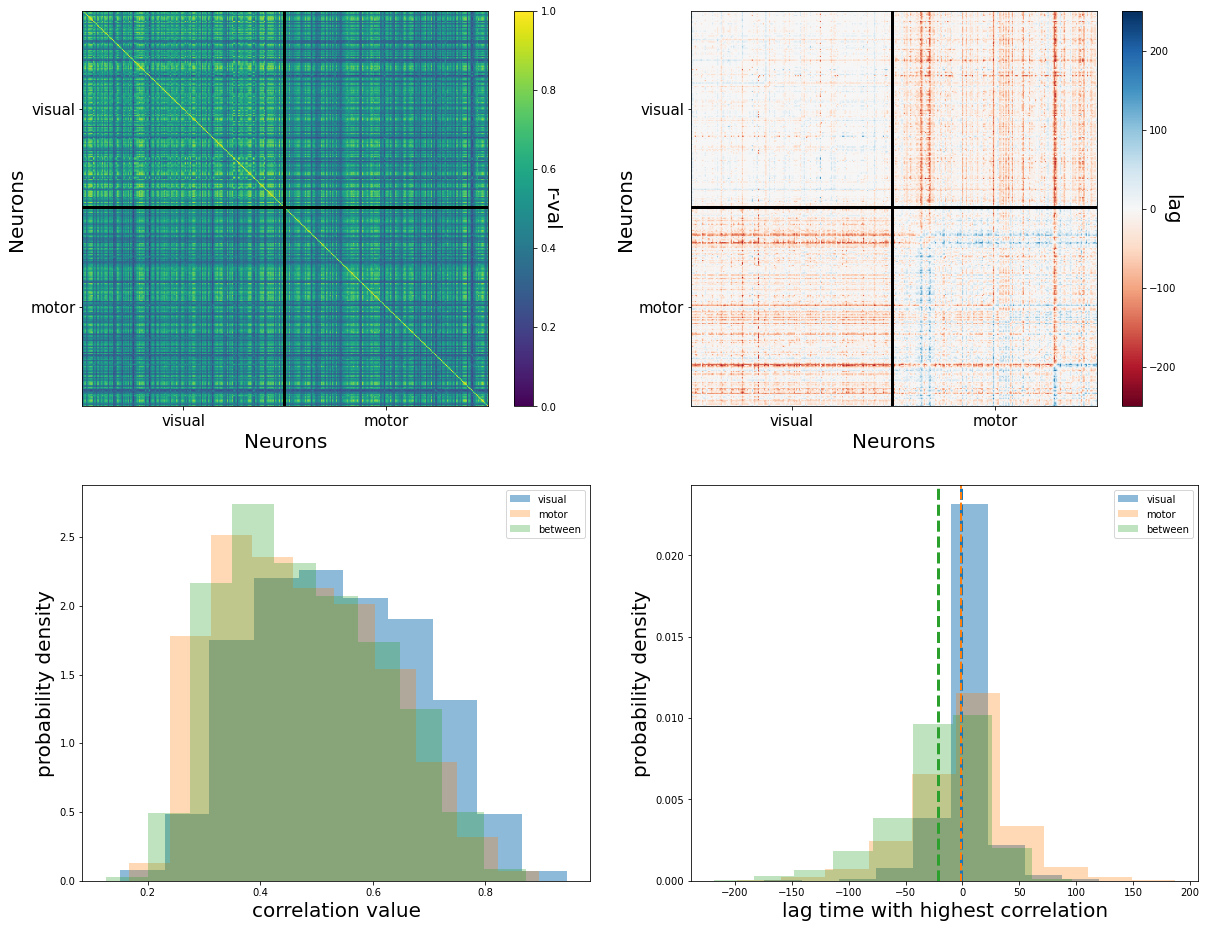

In [202]:
# matrix with visual + motor areas showing location of highest cross correlation
all_dat = np.vstack((vis_dat, motor_dat))   
corr = np.zeros(shape=(all_dat.shape[0],all_dat.shape[0]))
corr_idx = np.zeros(shape=(all_dat.shape[0],all_dat.shape[0]))
for i in range(all_dat.shape[0]):
    for j in range(i, all_dat.shape[0]):
        corr_tp = xcorr(np.mean(all_dat[i, :, :], axis=0), np.mean(all_dat[j, :, :], axis=0))
        corr[i, j]=np.max(corr_tp)
        corr_idx[i, j]=np.argmax(corr_tp)-250 # setting correct lag
        
vis_within, mot_within, between = plot_corr(corr, corr_idx, 0.1)

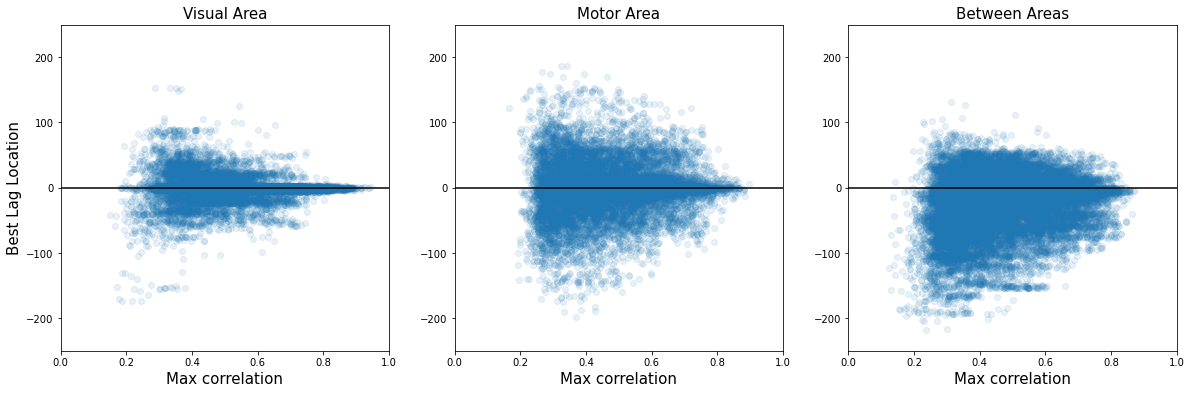

In [203]:
fig, axs = plot.subplots(1, 3, figsize=(20,6))

axs[0].scatter(corr[vis_within], corr_idx[vis_within], alpha=0.1, label='visual' )
axs[0].set_title('Visual Area', fontsize=FONT_SIZE)
axs[1].scatter(corr[mot_within], corr_idx[mot_within], alpha=0.1, label='motor')
axs[1].set_title('Motor Area', fontsize=FONT_SIZE)
axs[2].scatter(corr[between], corr_idx[between], alpha=0.1, label='between')
axs[2].set_title('Between Areas', fontsize=FONT_SIZE)

for i in range(3):
    axs[i].set_xlim(0, 1)
    axs[i].set_ylim(-250, 250)
    axs[i].axhline(0, color='black')
    axs[i].set_xlabel('Max correlation', fontsize=FONT_SIZE)
    
axs[0].set_ylabel('Best Lag Location', fontsize=FONT_SIZE);

### Comparing the results of correct vs. incorrect trials

Optimal lag between visual neurons: -62.91 ms
Optimal lag between motor neurons: -135.10 ms
Optimal lag between visual and motor: -261.43 ms


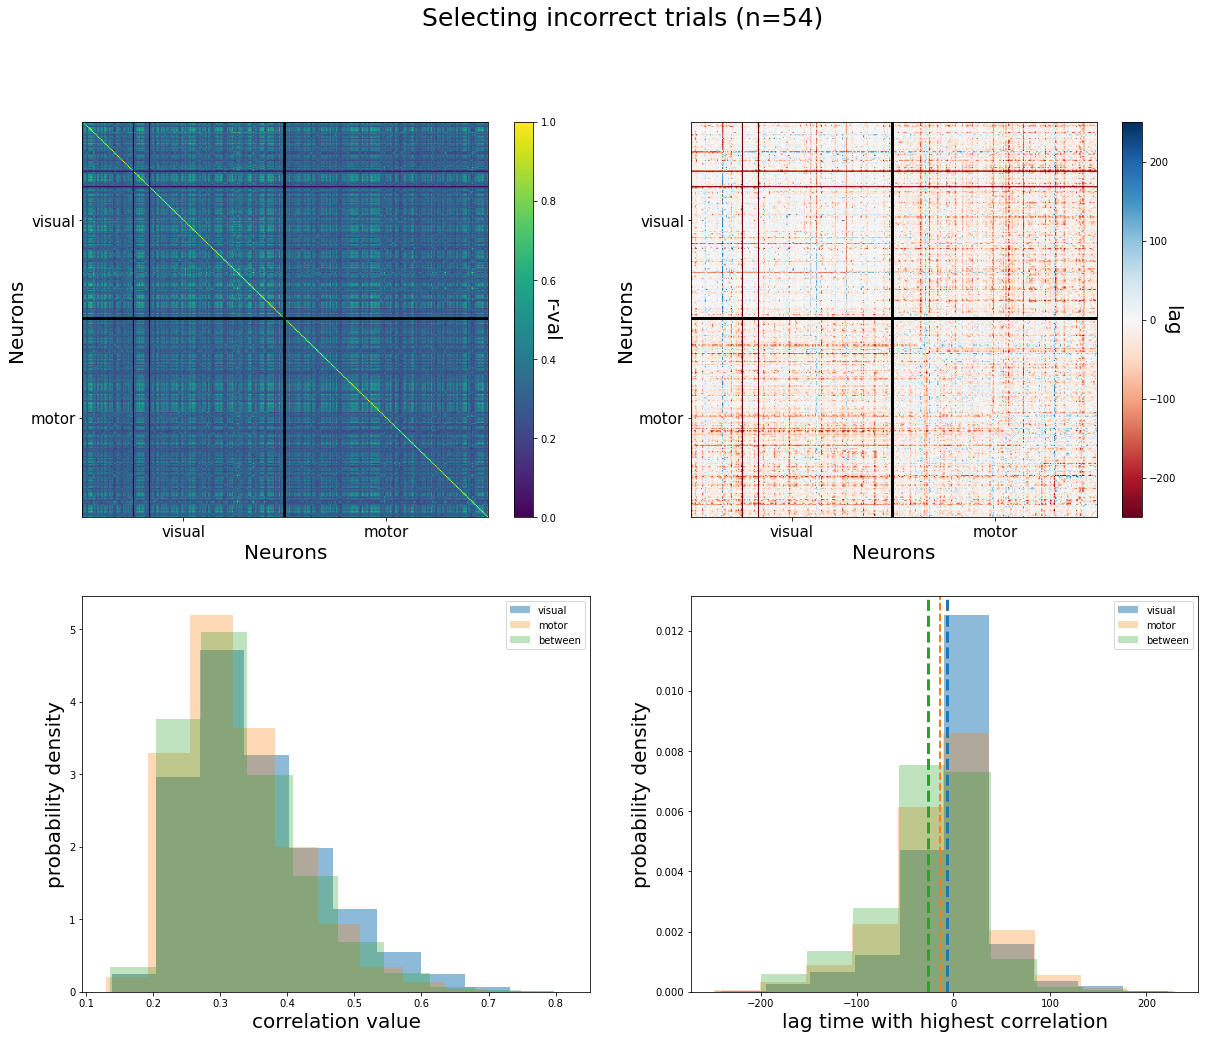

In [204]:
incorrect = np.where(np.logical_not(sel["CHOICE_CORRECT"]))[0];
incorrect = incorrect[incorrect < vis_dat.shape[1]];

# matrix with visual + motor areas showing location of highest cross correlation
all_dat = np.vstack((vis_dat[:, incorrect, :], motor_dat[:, incorrect, :]))   
corr = np.zeros(shape=(all_dat.shape[0],all_dat.shape[0]))
corr_idx = np.zeros(shape=(all_dat.shape[0],all_dat.shape[0]))
for i in range(all_dat.shape[0]):
    for j in range(i, all_dat.shape[0]):
        corr_tp = xcorr(np.mean(all_dat[i, :, :], axis=0), np.mean(all_dat[j, :, :], axis=0))
        corr[i, j]=np.max(corr_tp)
        corr_idx[i, j]=np.argmax(corr_tp)-250 # setting correct lag

plot_corr(corr, corr_idx);
plot.gcf().suptitle('Selecting incorrect trials (n=%i)' % len(incorrect), fontsize=FONT_SIZE+10);


Optimal lag between visual neurons: -12.85 ms
Optimal lag between motor neurons: 4.47 ms
Optimal lag between visual and motor: -240.23 ms


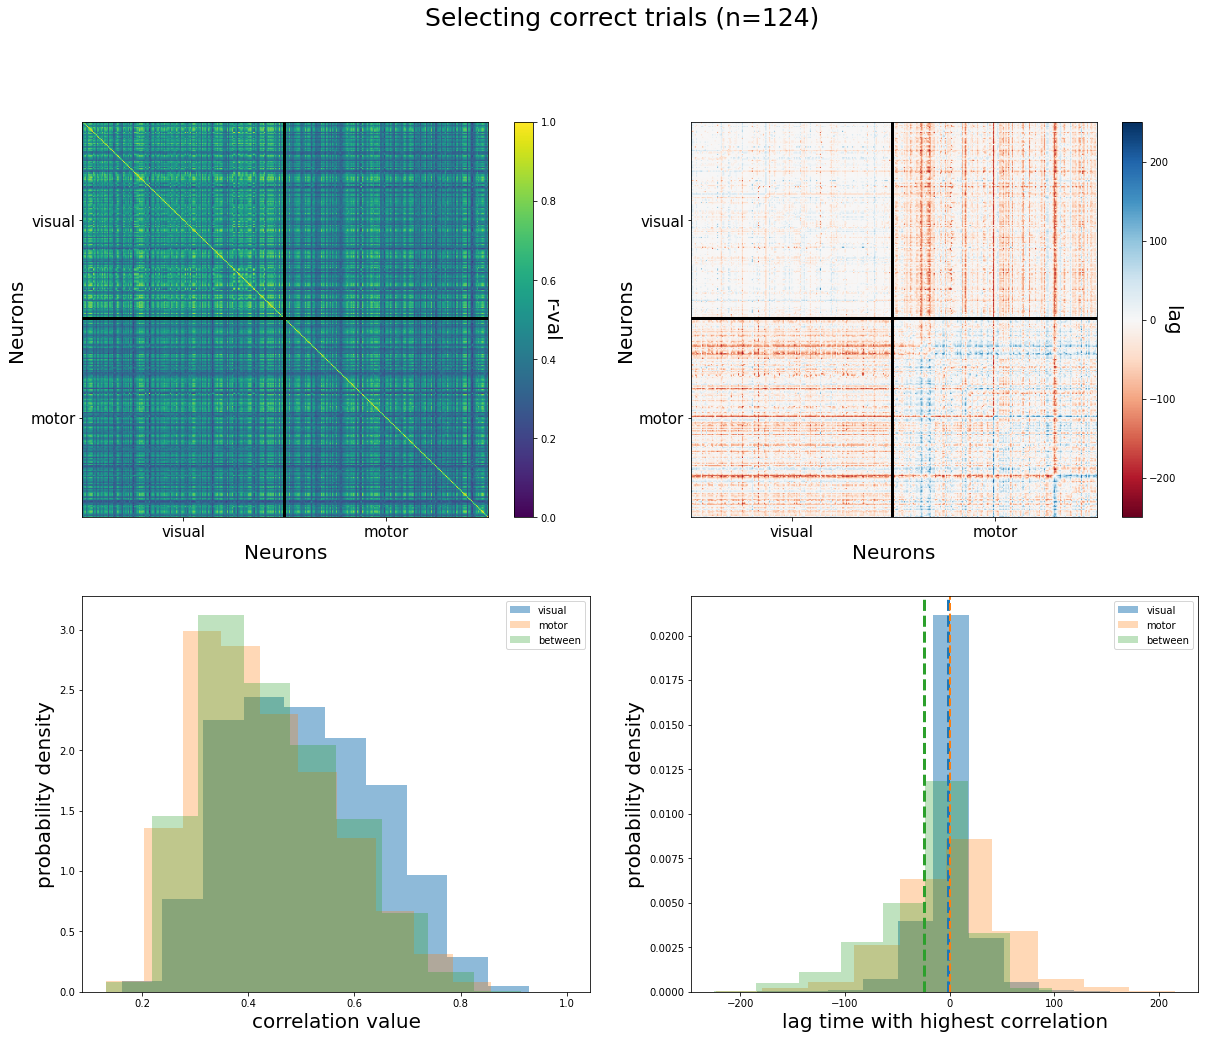

In [205]:
correct = np.where(sel["CHOICE_CORRECT"])[0];
correct = correct[correct < vis_dat.shape[1]];

# matrix with visual + motor areas showing location of highest cross correlation
all_dat = np.vstack((vis_dat[:, correct, :], motor_dat[:, correct, :]))   
corr = np.zeros(shape=(all_dat.shape[0],all_dat.shape[0]))
corr_idx = np.zeros(shape=(all_dat.shape[0],all_dat.shape[0]))
for i in range(all_dat.shape[0]):
    for j in range(i, all_dat.shape[0]):
        corr_tp = xcorr(np.mean(all_dat[i, :, :], axis=0), np.mean(all_dat[j, :, :], axis=0))
        corr[i, j]=np.max(corr_tp)
        corr_idx[i, j]=np.argmax(corr_tp)-250 # setting correct lag

plot_corr(corr, corr_idx);
plot.gcf().suptitle('Selecting correct trials (n=%i)' % len(correct), fontsize=FONT_SIZE+10);

## Exploring the session statistics

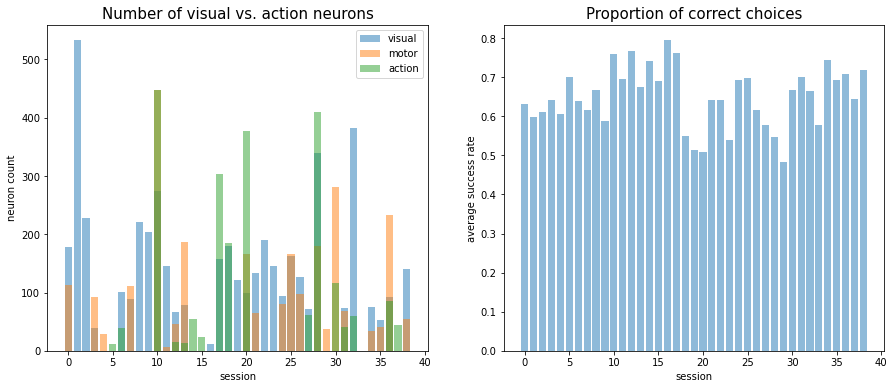

In [206]:
# summary of subject behavior and coverage
fig, axs = plot.subplots(1, 2, figsize=(15,6))

sessions = 39

visual_neurons=np.arange(sessions)
motor_neurons=np.arange(sessions)
action_neurons=np.arange(sessions)
percent_correct=np.arange(sessions, dtype=float)
for sub in range(sessions):
    sel = selectors[sub]
    visual_neurons[sub] =  alldat[sub]['spks'][sel["NEURON_VISUAL"]].shape[0]; 
    motor_neurons[sub] = alldat[sub]['spks'][sel["NEURON_MOTOR"]].shape[0]; 
    action_neurons[sub] = alldat[sub]['spks'][sel["NEURON_ACTION"]].shape[0]; 
    percent_correct[sub] = np.mean(sel["CHOICE_CORRECT"]);

axs[0].bar(np.arange(0, sessions, 1), visual_neurons, label='visual', alpha=0.5)
axs[0].bar(np.arange(0, sessions, 1), motor_neurons, label='motor', alpha=0.5)
axs[0].bar(np.arange(0, sessions, 1), action_neurons, label='action', alpha=0.5)
axs[1].bar(np.arange(sessions), percent_correct, label='success', alpha=0.5)

axs[1].set_xlabel('session')
axs[0].set_xlabel('session')

axs[1].set_ylabel('average success rate')
axs[0].set_ylabel('neuron count')

axs[1].set_title('Proportion of correct choices', fontsize=FONT_SIZE)
axs[0].set_title('Number of visual vs. action neurons', fontsize=FONT_SIZE)

axs[0].legend()